<a href="https://colab.research.google.com/github/rebeufou/Mini-Project-Data/blob/main/TD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import eig,svd
A = np.array([[3, 21], [3, 32], [4, 43], [6, 64]])
X = A[:, 0]
Y = A[:, 1]
moyenne_X = np.mean(X) #A.mean(axis=0)
moyenne_Y = np.mean(Y)
ecarttype_X = np.std(X)
ecarttype_Y = np.std(Y)
print("Moyenne de X:", moyenne_X)
print("Moyenne de Y:", moyenne_Y)
print("Écart type de X:", ecarttype_X)
print("Écart type de Y:", ecarttype_Y)



SyntaxError: invalid syntax (<ipython-input-10-da11cce7037a>, line 2)

In [ ]:
X_std = (X- moyenne_X) / ecarttype_X
Y_std = (Y- moyenne_Y) / ecarttype_Y
print("Standardisation de X :",X_std)
print("Standardisation de Y :",Y_std)
A_std = np.column_stack((X_std, Y_std))
print("A_std :",A_std)

Standardisation de X : [-0.81649658 -0.81649658  0.          1.63299316]
Standardisation de Y : [-1.19570187 -0.50345342  0.18879503  1.51036026]
A_std : [[-0.81649658 -1.19570187]
 [-0.81649658 -0.50345342]
 [ 0.          0.18879503]
 [ 1.63299316  1.51036026]]


In [ ]:

V = 1/3*A_std.T@A_std
print("V :",V)

V : [[1.33333333 1.28458749]
 [1.28458749 1.33333333]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(V)
print("Les valeurs propres de V sont:", eigenvalues)
print('Les vecteurs propres associés sont:', eigenvectors)

Les valeurs propres de V sont: [2.61792082 0.04874584]
Les vecteurs propres associés sont: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
X_vect = eigenvectors[:, 0]
Y_vect = eigenvectors[:, 1]
C1 = A_std * X_vect
C2 = A_std * Y_vect
X_pca = np.column_stack((C1,C2))
print(X_pca)

[[-0.57735027 -0.8454889   0.57735027 -0.8454889 ]
 [-0.57735027 -0.35599533  0.57735027 -0.35599533]
 [ 0.          0.13349825 -0.          0.13349825]
 [ 1.15470054  1.06798598 -1.15470054  1.06798598]]


In [ ]:
from numpy.linalg import eig,svd
U, S, Vt = svd(V, full_matrices=True)
U
S

array([2.61792082, 0.04874584])

In [ ]:
C1 = A_std@U[0]
print(C1)

[ 1.42283917  0.9333456  -0.13349825 -2.22268652]


In [ ]:
C2 = A_std@U[1]
print(C2)

[-0.26813863  0.22135494  0.13349825 -0.08671456]


In [ ]:

X_pca = np.array((C1,C2)).T #transposée pour avoir le même résultat que sur la partie 1
print(X_pca)

[[ 1.42283917 -0.26813863]
 [ 0.9333456   0.22135494]
 [-0.13349825  0.13349825]
 [-2.22268652 -0.08671456]]


#%% Exercice 1
#######################
#%%créer le jeu de donnée
A=np.array([[3,21],[3,32],[4,43],[6,64]])
print(A)

#calcul de la moyenne
m=A.mean(axis=0)
print(m)

#calcul de l'écart type
s=A.std(axis=0)#c'est la formule avec une division par n
print(s)

#standardiser A
A_std=(A-m)/s
A_std

#calcul de la matrice de variance
V=1/3*A_std.T@A_std
print(V)

#vect propre
U, lambdas, Vt = svd(V, full_matrices=True)
print(U)
print(lambdas)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

A = np.array([[3, 21], [3, 32], [4, 43], [6, 64]])

# standardiser les données
scaler = StandardScaler()
Z = scaler.fit_transform(A)
# créer le model de la PCA
pca = PCA(n_components=2)
# appliquer la PCA à la base de donnée
pca.fit(Z)
# projeter les données
x_pca = pca.transform(Z)
# ou bien appliquer la PCA et la projeter
#x_pca = pca.fit_transform(Z)
print(x_pca)

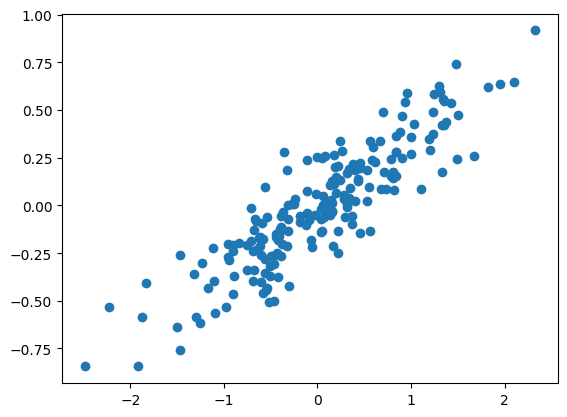

In [ ]:
#Exercice 2
#Q3
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
data = (rng.rand(2, 2)@rng.randn(2, 200)).T

x=data[:,0]
y=data[:,1]

plt.plot(x,y, 'o')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca=PCA(n_components=2)
pca.fit(data_scaled)
x_pca = pca.transform(data_scaled)

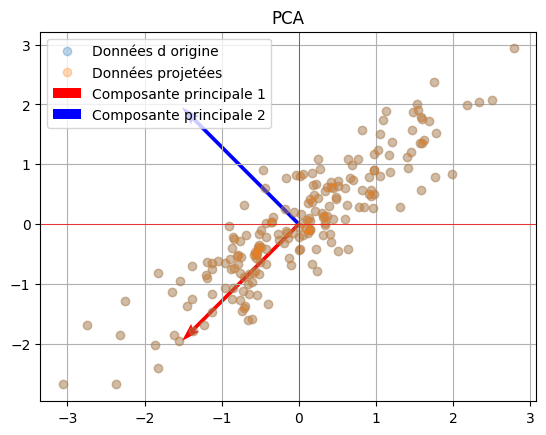

In [ ]:
data_projected = pca.inverse_transform(x_pca)

plt.plot(data_scaled[:, 0], data_scaled[:, 1], 'o', label='Données d origine',alpha = 0.3)
plt.plot(data_projected[:, 0], data_projected[:, 1], 'o', label='Données projetées', alpha = 0.3)


plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], scale=3, color='r', label='Composante principale 1')
plt.quiver(0, 0, pca.components_[1, 0], pca.components_[1, 1], scale=3, color='b', label='Composante principale 2')
plt.axhline(0, color='red',linewidth=0.5)
plt.axvline(0, color='red',linewidth=0.5)
plt.title('PCA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print(explained_var)

[0.98172031 1.        ]


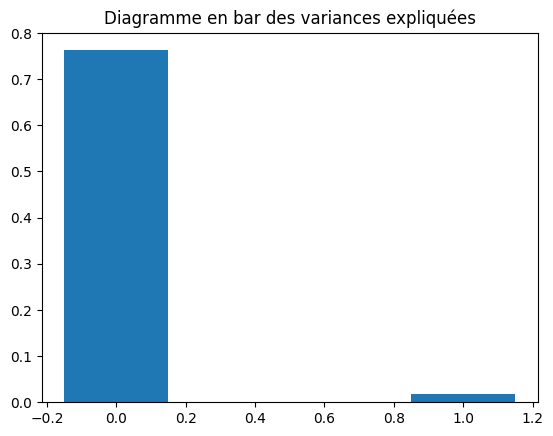

In [ ]:
plt.bar([0,1], pca.explained_variance_, width = 0.3)
plt.title('Diagramme en bar des variances expliquées')
plt.xlim([])
plt.show()


In [ ]:
#Exercice 3
import pandas as pd

In [ ]:
df = pd.read_csv("auto.csv")

In [ ]:
df.head(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [ ]:
col_names = [ "symboling" , "normalized-losses" , "make" , "fuel-type" , "aspiration" ,
"num-of-doors","body-style", "drive-wheels" , "emplacement du moteur" ,
"empattement" , "longueur" , "largeur" , "hauteur" , "poids à vide" , "type de moteur" ,
"nombre de cylindres" , "taille du moteur" , "système de carburant" , "alésage" ,
"course","taux de compression","puissance", "crème-rpm" , "ville-mpg" , "autoroutempg" , "prix" ]

In [ ]:
df.columns = col_names

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,taux de compression,puissance,crème-rpm,ville-mpg,autoroutempg,prix
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,taux de compression,puissance,crème-rpm,ville-mpg,autoroutempg,prix
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              204 non-null    int64  
 1   normalized-losses      204 non-null    object 
 2   make                   204 non-null    object 
 3   fuel-type              204 non-null    object 
 4   aspiration             204 non-null    object 
 5   num-of-doors           204 non-null    object 
 6   body-style             204 non-null    object 
 7   drive-wheels           204 non-null    object 
 8   emplacement du moteur  204 non-null    object 
 9   empattement            204 non-null    float64
 10  longueur               204 non-null    float64
 11  largeur                204 non-null    float64
 12  hauteur                204 non-null    float64
 13  poids à vide           204 non-null    int64  
 14  type de moteur         204 non-null    object 
 15  nombre

In [ ]:
df.shape()

TypeError: 'tuple' object is not callable

In [ ]:
df.dtypes

symboling                  int64
normalized-losses         object
make                      object
fuel-type                 object
aspiration                object
num-of-doors              object
body-style                object
drive-wheels              object
emplacement du moteur     object
empattement              float64
longueur                 float64
largeur                  float64
hauteur                  float64
poids à vide               int64
type de moteur            object
nombre de cylindres       object
taille du moteur           int64
système de carburant      object
alésage                   object
course                    object
taux de compression      float64
puissance                 object
crème-rpm                 object
ville-mpg                  int64
autoroutempg               int64
prix                      object
dtype: object

In [ ]:
df.describe()

,symboling,empattement,longueur,largeur,hauteur,poids à vide,taille du moteur,taux de compression,ville-mpg,autoroutempg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,type de moteur,nombre de cylindres,système de carburant,alésage,course,puissance,crème-rpm,prix
count,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,186
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,40,32,184,167,114,96,120,201,148,158,93,23,20,19,37,4


In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
df.isna().sum()

symboling                 0
normalized-losses        40
make                      0
fuel-type                 0
aspiration                0
num-of-doors              2
body-style                0
drive-wheels              0
emplacement du moteur     0
empattement               0
longueur                  0
largeur                   0
hauteur                   0
poids à vide              0
type de moteur            0
nombre de cylindres       0
taille du moteur          0
système de carburant      0
alésage                   4
course                    4
taux de compression       0
puissance                 2
crème-rpm                 2
ville-mpg                 0
autoroutempg              0
prix                      4
dtype: int64

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

symboling                 0
normalized-losses        40
make                      0
fuel-type                 0
aspiration                0
num-of-doors              2
body-style                0
drive-wheels              0
emplacement du moteur     0
empattement               0
longueur                  0
largeur                   0
hauteur                   0
poids à vide              0
type de moteur            0
nombre de cylindres       0
taille du moteur          0
système de carburant      0
alésage                   4
course                    4
taux de compression       0
puissance                 2
crème-rpm                 2
ville-mpg                 0
autoroutempg              0
prix                      4
dtype: int64

In [ ]:
df.isna().sum().sum()

58

In [ ]:
round(df.isna().sum().sum() / df.size * 100, 1)

1.1

In [ ]:
df.drop_duplicates()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,taux de compression,puissance,crème-rpm,ville-mpg,autoroutempg,prix
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
missing = df.isna().sum().sum()
missing

58

In [ ]:
percentage_missing = missing/(204*26)*100

In [ ]:
percentage_missing

1.0935143288084463